In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import sklearn.datasets
from init_utils import *

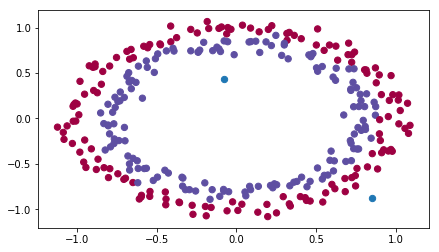

In [6]:
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = load_dataset()
plt.scatter(train_X[:, 0], train_X[:, 1], s=40, cmap=plt.cm.Spectral)
plt.show()


In [3]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True,
          initialization="he"):
    grads = {}
    costs =[]
    m = X.shape[1]
    layer_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layer_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layer_dims) 
    elif initialization == "he":
        parameters = initialize_parameters_he(layer_dims)
    
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i%1000==0:
            print("Cost after iteration %d: %f", i, cost)
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters
    

E:\my_github\nn_practice\cousera_assignment\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\my_github\nn_practice\cousera_assignment\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration %d: %f 0 inf
Cost after iteration %d: %f 1000 0.625098279396
Cost after iteration %d: %f 2000 0.59812165967
Cost after iteration %d: %f 3000 0.56384175723
Cost after iteration %d: %f 4000 0.55017030492
Cost after iteration %d: %f 5000 0.544463290966
Cost after iteration %d: %f 6000 0.5374513807
Cost after iteration %d: %f 7000 0.476404207407
Cost after iteration %d: %f 8000 0.397814922951
Cost after iteration %d: %f 9000 0.393476402877
Cost after iteration %d: %f 10000 0.392029546188
Cost after iteration %d: %f 11000 0.389245981351
Cost after iteration %d: %f 12000 0.386154748571
Cost after iteration %d: %f 13000 0.38498472891
Cost after iteration %d: %f 14000 0.382782830835


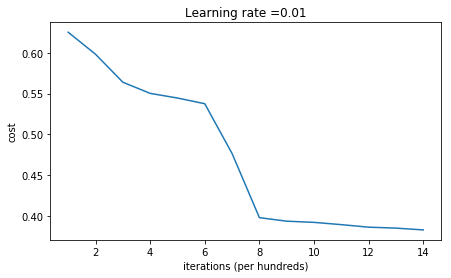

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


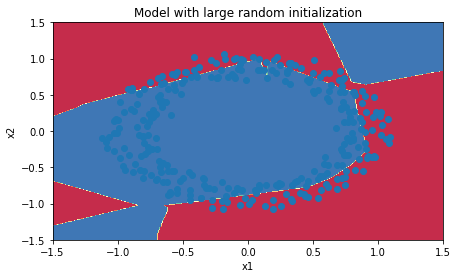

In [13]:
def initialize_parameters_zeros(layer_dims):
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters["W"+str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))
        parameters["b"+str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

def initialize_parameters_random(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*10
        parameters["b"+str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X,train_Y)

Cost after iteration %d: %f 0 0.883053746342
Cost after iteration %d: %f 1000 0.687982591973
Cost after iteration %d: %f 2000 0.675128626452
Cost after iteration %d: %f 3000 0.652611776889
Cost after iteration %d: %f 4000 0.608295897057
Cost after iteration %d: %f 5000 0.530494449172
Cost after iteration %d: %f 6000 0.413864581707
Cost after iteration %d: %f 7000 0.311780346484
Cost after iteration %d: %f 8000 0.236962153303
Cost after iteration %d: %f 9000 0.185972872092
Cost after iteration %d: %f 10000 0.150155562804
Cost after iteration %d: %f 11000 0.123250792923
Cost after iteration %d: %f 12000 0.0991774654653
Cost after iteration %d: %f 13000 0.0845705595402
Cost after iteration %d: %f 14000 0.0735789596268


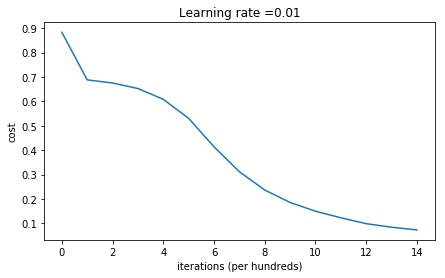

On the train set:
Accuracy: 0.993333333333
On the test set:
Accuracy: 0.96


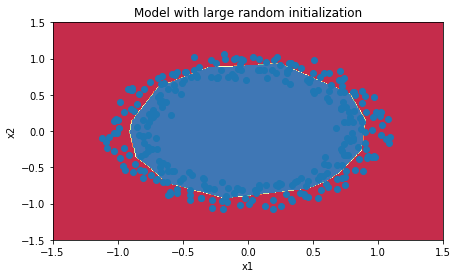

In [12]:
def initialize_parameters_he(layer_dims):
    np.random.seed(3)
    
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1,L):
        parameters["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])* \
            np.sqrt(2./layer_dims[l-1])
        parameters["b"+str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X,train_Y)

#结论是权重参数不能全部初始化为0，在可见提点中我已经强调过这点
#收敛比较快的初始化方式，是将权重参数随机初始化（可以是正态分布的），并乘以0.1
#注意练习手册中的conclusions，搜一下着重记录